<a href="https://colab.research.google.com/github/kernelmans/my-ai-codes/blob/main/mini_reseau_sigmoide_re%CC%81tropropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini réseau de neurones sigmoïde — apprentissage complet avec rétropropagation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Fonction sigmoïde et sa dérivée
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

In [3]:
# Dataset XOR-like
X_train = np.array([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0]
])

y_train = np.array([0, 1, 1, 0])

In [4]:
# Initialisation des poids
np.random.seed(0)
w_h1 = np.random.randn(2)
w_h2 = np.random.randn(2)
b_h1 = 0.0
b_h2 = 0.0

w_out = np.random.randn(2)
b_out = 0.0

In [5]:
# Paramètres d'apprentissage
eta = 0.1
epochs = 1000
loss_history = []

In [6]:
# Entraînement
for epoch in range(epochs):
    total_error = 0
    for x, y in zip(X_train, y_train):
        # Forward pass
        z1 = np.dot(w_h1, x) + b_h1
        a1 = sigmoid(z1)

        z2 = np.dot(w_h2, x) + b_h2
        a2 = sigmoid(z2)

        hidden_output = np.array([a1, a2])

        z_out = np.dot(w_out, hidden_output) + b_out
        y_hat = sigmoid(z_out)

        # Erreur
        error = 0.5 * (y_hat - y) ** 2
        total_error += error

        # Backpropagation
        delta_out = (y_hat - y) * sigmoid_derivative(y_hat)

        # Mise à jour sortie
        w_out -= eta * delta_out * hidden_output
        b_out -= eta * delta_out

        # Deltas cachés
        delta_h1 = sigmoid_derivative(a1) * delta_out * w_out[0]
        delta_h2 = sigmoid_derivative(a2) * delta_out * w_out[1]

        w_h1 -= eta * delta_h1 * x
        b_h1 -= eta * delta_h1

        w_h2 -= eta * delta_h2 * x
        b_h2 -= eta * delta_h2

    loss_history.append(total_error)

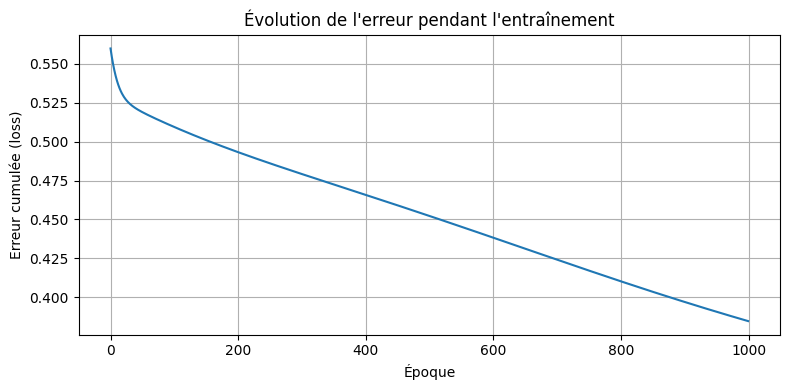

In [7]:
# Affichage de la courbe d'apprentissage
plt.figure(figsize=(8, 4))
plt.plot(loss_history)
plt.title("Évolution de l'erreur pendant l'entraînement")
plt.xlabel("Époque")
plt.ylabel("Erreur cumulée (loss)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Prédictions après entraînement
print("=== Prédictions après entraînement ===")
for x, y in zip(X_train, y_train):
    z1 = np.dot(w_h1, x) + b_h1
    a1 = sigmoid(z1)

    z2 = np.dot(w_h2, x) + b_h2
    a2 = sigmoid(z2)

    hidden_output = np.array([a1, a2])
    y_hat = sigmoid(np.dot(w_out, hidden_output) + b_out)

    print(f"Entrée : {x}, Prédit : {round(y_hat, 3)}, Attendu : {y}")

=== Prédictions après entraînement ===
Entrée : [0. 0.], Prédit : 0.295, Attendu : 0
Entrée : [0. 1.], Prédit : 0.514, Attendu : 1
Entrée : [1. 0.], Prédit : 0.664, Attendu : 1
Entrée : [1. 1.], Prédit : 0.566, Attendu : 0
